In [2]:
#import libraries
import pandas as pd
import cbsodata as cbs
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
#load data
#data_license = pd.DataFrame(cbs.get_data('83488ENG'))
data_traffic_original = pd.DataFrame(cbs.get_data('84707ENG'))
#data_travel = pd.DataFrame(cbs.get_data('84713ENG'))

In [4]:
data_traffic_original.set_index('ID', inplace=True)
data_traffic = data_traffic_original.rename({'UseOfPublicTransport_2': 'Daily public transport use %'}, axis = 1)
data_traffic = data_traffic.rename({'TrafficParticipation_1': 'Daily traffic participation %'}, axis = 1)
data_traffic = data_traffic.rename({'Periods': 'Year'}, axis = 1)
data_traffic = data_traffic.drop(columns=['Population', 'Margins'])
data_traffic = data_traffic[(data_traffic.Sex == 'Total male and female')]
data_traffic.head()

,Sex,PersonalCharacteristics,Year,Daily traffic participation %,Daily public transport use %
ID,,,,,
0,Total male and female,Total persons,2018,82.9,8.6
1,Total male and female,Total persons,2019,81.9,8.6
2,Total male and female,Total persons,2020,73.8,3.9
3,Total male and female,Total persons,2021,78.1,4.2
4,Total male and female,Total persons,2018,82.5,8.3


TrafficParticipation_1 = The proportion of persons going out on public roads in a day, either as a pedestrian or as a user (driver or passenger) of a means of transport. Traffic participation is derived from the proportion of people who have made at least one trip on the day of the survey. 

UseOfPublicTransport_2 = The proportion of people who have made at least one stage by public transport (train, bus, tram or metro) in a day.



In [88]:
#data_traffic['PersonalCharacteristics'].unique()

In [5]:
#filter driving license y/n

Personal_Characteristics = ["Driver's license, pass. car, in own name",
       "Driver's license, passenger car in hh",
       "Driver's license, no passenger car in hh",
       "No driver's license; 17 years or older",] 
    
#selecting rows based on condition 
data_traffic_licence = data_traffic[data_traffic['PersonalCharacteristics'].isin(Personal_Characteristics)]

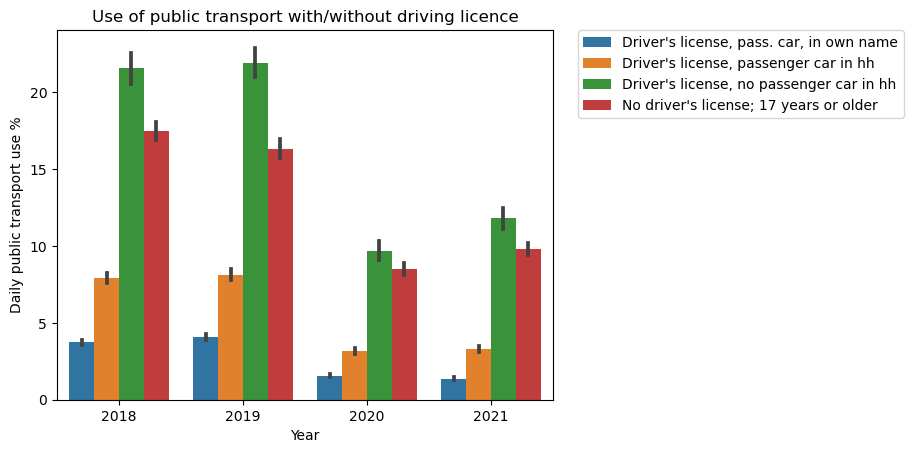

In [6]:
sns_plot = sns.barplot(x='Year', y='Daily public transport use %', data=data_traffic_licence, hue ='PersonalCharacteristics')
sns_plot.figure.savefig('plot1.png')
plt.title('Use of public transport with/without driving licence')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

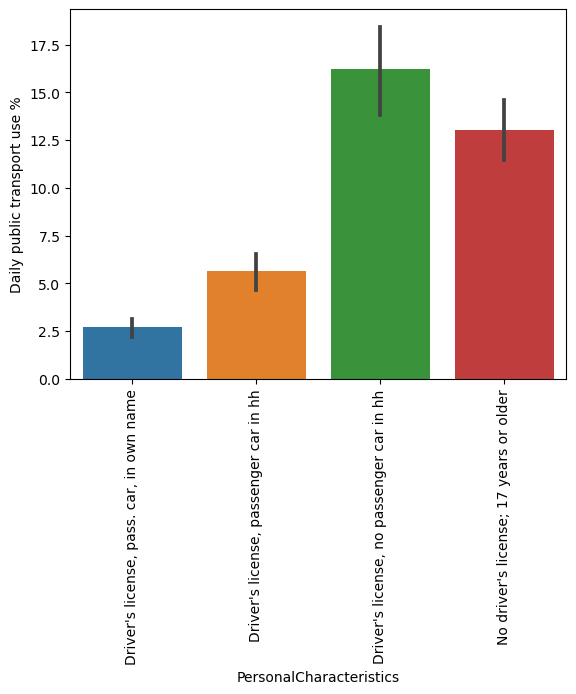

In [7]:
sns.barplot(x='PersonalCharacteristics', y='Daily public transport use %', data=data_traffic_licence)
plt.xticks(rotation=90)
plt.show()

In [8]:
#filter male/female - do not sort on gender
data_traffic_filter = data_traffic[(data_traffic.Sex == 'Total male and female')]

#remove not needed personal characteristic groups
options = ['Total persons', 'Age: 6 to 11 years', 'Age: 12 to 17 years',
       "Driver's license, pass. car, in own name",
       "Driver's license, passenger car in hh",
       "Driver's license, no passenger car in hh",
       "No driver's license; 17 years or older",
       "No driver's license; under 17"] 
    
# selecting rows based on condition 
data_traffic_filter = data_traffic_filter[~data_traffic_filter['PersonalCharacteristics'].isin(options)]
data_traffic_filter = data_traffic_filter.drop_duplicates()
data_traffic_filter.sort_values('Daily public transport use %', ascending=True).head(10)

#show per year



,Sex,PersonalCharacteristics,Year,Daily traffic participation %,Daily public transport use %
ID,,,,,
102,Total male and female,Age: 75 years or older,2020,50.2,0.8
103,Total male and female,Age: 75 years or older,2021,58.4,0.9
98,Total male and female,Age: 75 years or older,2020,51.6,1.1
342,Total male and female,Participation: retired,2020,61.7,1.2
99,Total male and female,Age: 75 years or older,2021,59.7,1.2
343,Total male and female,Participation: retired,2021,68.6,1.3
90,Total male and female,Age: 65 to 74 years,2020,66.6,1.3
338,Total male and female,Participation: retired,2020,62.7,1.4
106,Total male and female,Age: 75 years or older,2020,52.9,1.4


hier overzicht van vier plotjes (2018 - 2019 - 2020 - 2021) en dan zichtbaar welke PersonalCharacteristics het minste Daily public transport use hebben

mensen die weinig met ov reizen = oude mensen en die hebben vaak ook geen rijbewijs (meer)

plot van Jochem - rijbewijsbezit per leeftijdscategorie